# Projeto do Curso

**Disciplina:** COS868 - Probabilidade e Estatı́stica para Aprendizado de Máquina

**Período:** 3/2023

**Professora**: Rosa Maria Meri Leão

**Aluno**: Ian José Agra Gomes

In [1]:
# Importação das bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm, gamma, chi2
from scipy.optimize import minimize

# 1 Dataset

In [2]:
# Leitura dos datasets
df_chromecast = pd.read_csv('dataset_chromecast.csv')
df_smarttv = pd.read_csv('dataset_smart-tv.csv')

In [3]:
# Verificação da estrutura do dataset de Chromecast
df_chromecast.head()

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000


In [4]:
df_chromecast

,device_id,date_hour,bytes_up,bytes_down
0,66161985,2021-09-06 00:01:00,2987.016393,49185.704918
1,66161985,2021-09-06 00:02:00,685.935484,328.258065
2,66161985,2021-09-06 00:03:00,4493.901639,37914.064516
3,66161985,2021-09-06 00:04:00,776.133333,229.200000
4,66161985,2021-09-06 00:05:00,3081.311475,51656.800000
...,...,...,...,...
1620524,90339988,2021-11-26 16:52:00,2024.000000,43432.000000
1620525,90339988,2021-11-26 16:53:00,7088.000000,1592.000000
1620526,90339988,2021-11-26 16:54:00,488.000000,49632.000000
1620527,90339988,2021-11-26 16:55:00,0.000000,136.000000


In [5]:
# Verificando a existência de valores ausentes no dataset de Chromecast
df_chromecast.isna().sum()

device_id     0
date_hour     0
bytes_up      0
bytes_down    0
dtype: int64

In [6]:
# Verificação da estrutura do dataset de Smart-TV
df_smarttv.head()

,device_id,date_hour,bytes_up,bytes_down
0,77209603,2021-11-22 15:23:00,132932.983607,2.818140e+06
1,77209603,2021-11-22 15:24:00,115770.491803,2.264410e+06
2,77209603,2021-11-22 15:25:00,114030.032787,2.309270e+06
3,77209603,2021-11-22 15:26:00,97170.622951,2.006544e+06
4,77209603,2021-11-22 15:27:00,39569.573770,8.061440e+05


In [7]:
# Verificando a existência de valores ausentes no dataset de Smart-TV
df_smarttv.isna().sum()

device_id     0
date_hour     0
bytes_up      0
bytes_down    0
dtype: int64

In [8]:
# Função de reescalonamento dos valores diferentes de zero para escala logarítmica na base 10
def log10_safe(x):
    return np.log10(x) if x != 0 else 0

# Aplicação da função de reescalonamento nos datasets
df_chromecast['bytes_up'] = df_chromecast['bytes_up'].apply(log10_safe)
df_chromecast['bytes_down'] = df_chromecast['bytes_down'].apply(log10_safe)
df_smarttv['bytes_up'] = df_smarttv['bytes_up'].apply(log10_safe)
df_smarttv['bytes_down'] = df_smarttv['bytes_down'].apply(log10_safe)

# 2 Estatísticas Gerais

In [9]:
# Verificação de dados estatísticos básicos do dataset de Chromecast
df_chromecast.describe()

,device_id,bytes_up,bytes_down
count,1.620529e+06,1.620529e+06,1.620529e+06
mean,5.818912e+07,3.349672e+00,3.799335e+00
std,2.539459e+07,6.794116e-01,1.290728e+00
min,1.340831e+07,-7.619044e-01,-5.247409e-01
25%,3.463380e+07,2.941114e+00,2.660437e+00
50%,5.955653e+07,3.332277e+00,4.025005e+00
75%,8.150487e+07,3.601741e+00,4.638819e+00
max,9.223786e+07,7.104713e+00,7.326115e+00


In [10]:
# Verificação de dados estatísticos básicos do dataset de Smart-TV
df_smarttv.describe()

,device_id,bytes_up,bytes_down
count,4.417903e+06,4.417903e+06,4.417903e+06
mean,5.632770e+07,2.156590e+00,2.350173e+00
std,2.723123e+07,2.028074e+00,2.593052e+00
min,1.068696e+07,-1.699051e+00,-1.922282e+00
25%,3.211258e+07,0.000000e+00,0.000000e+00
50%,5.274625e+07,2.161568e+00,1.649774e+00
75%,8.336571e+07,4.100739e+00,5.218382e+00
max,9.941789e+07,8.721107e+00,8.755698e+00


Números de bins calculados
Chromecast: 21
Smart-TV: 23


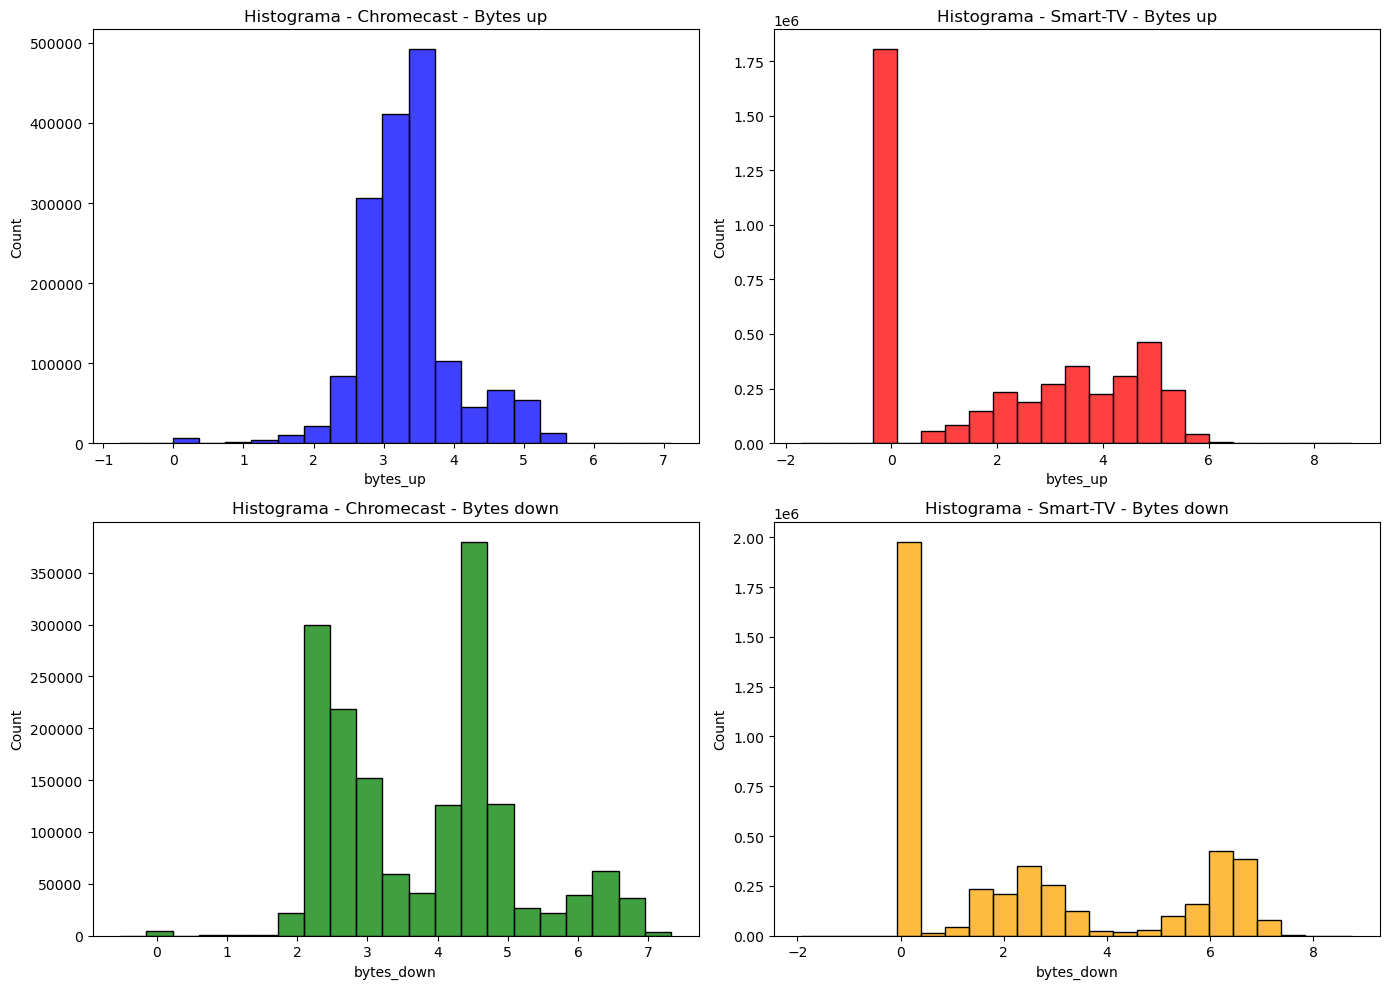

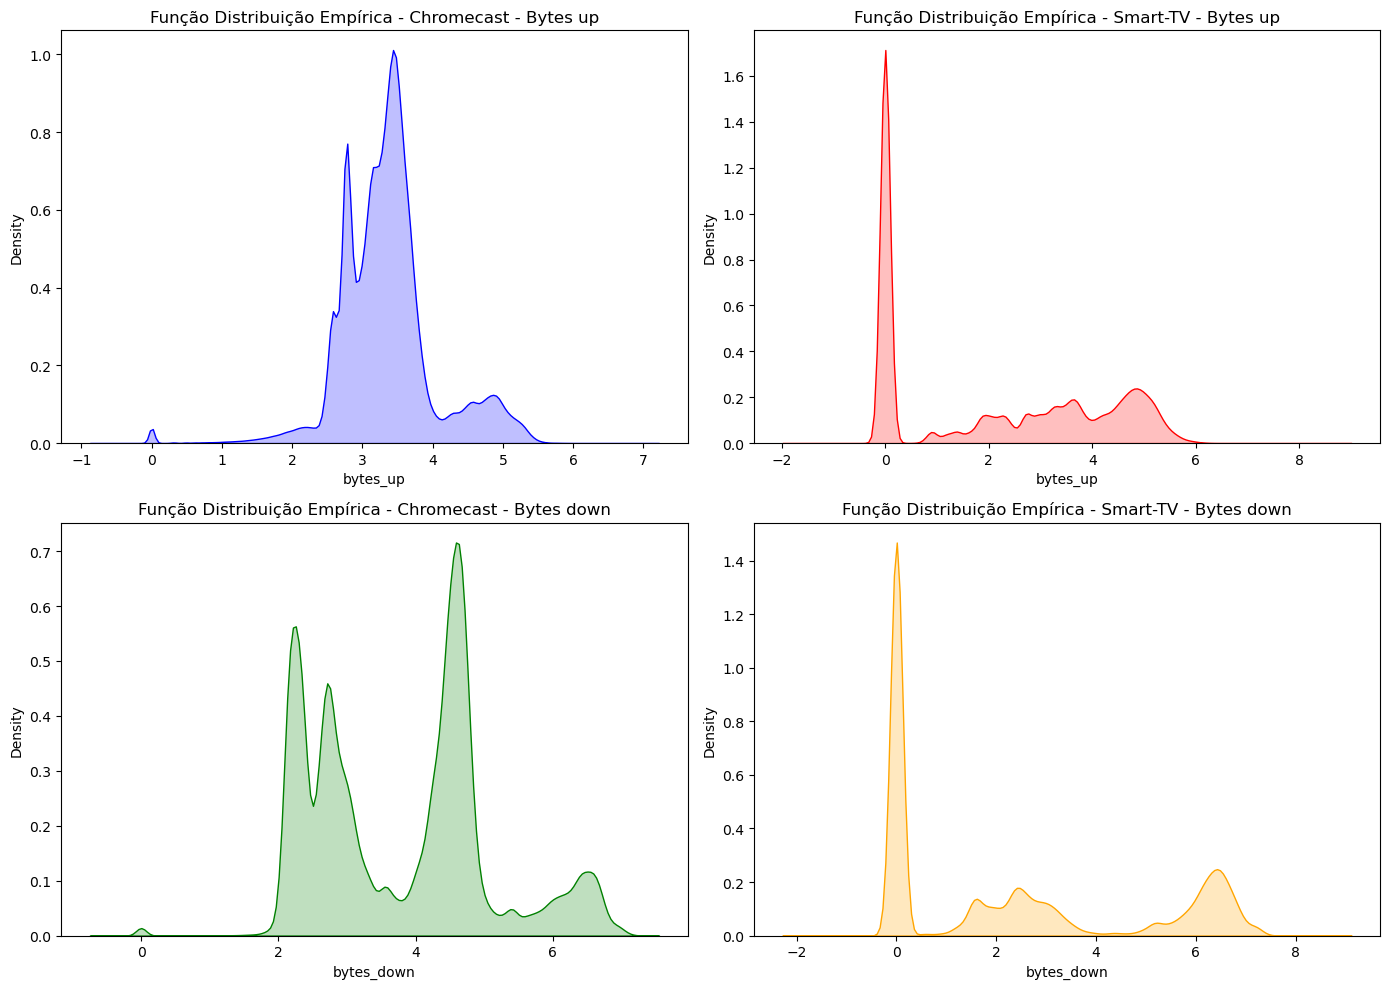

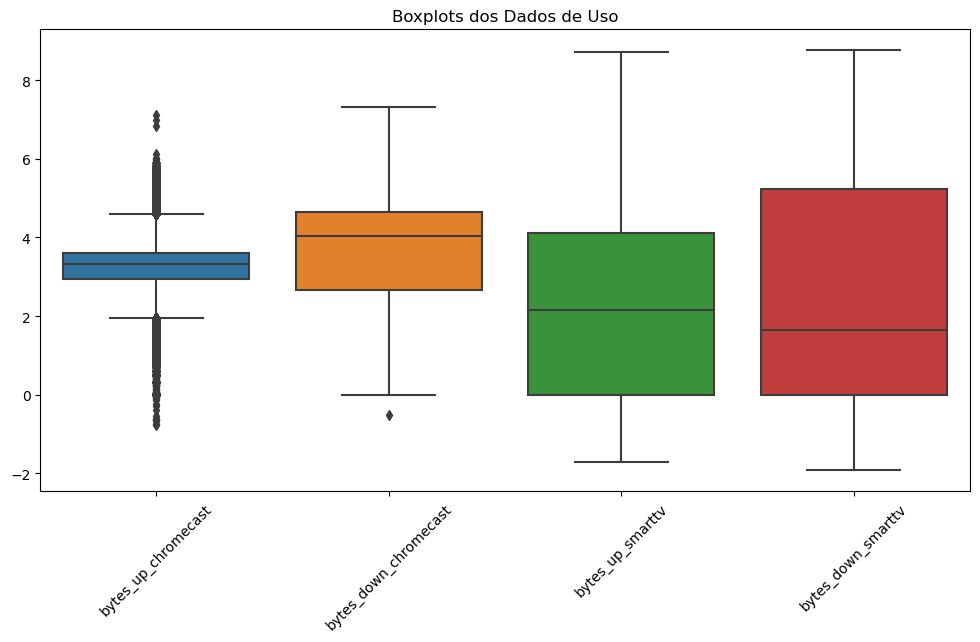

In [11]:
# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Cálculo do número de bins pelo método de Sturges
num_bins_chromecast = int(1 + np.log2(len(df_chromecast)))
num_bins_smarttv = int(1 + np.log2(len(df_smarttv)))
print(f'Números de bins calculados\nChromecast: {num_bins_chromecast}\nSmart-TV: {num_bins_smarttv}')

# Histogramas
sns.histplot(df_chromecast['bytes_up'], ax=axes[0, 0], color='blue', bins=num_bins_chromecast)
axes[0, 0].set_title('Histograma - Chromecast - Bytes up')
sns.histplot(df_smarttv['bytes_up'], ax=axes[0, 1], color='red', bins=num_bins_smarttv)
axes[0, 1].set_title('Histograma - Smart-TV - Bytes up')

sns.histplot(df_chromecast['bytes_down'], ax=axes[1, 0], color='green', bins=num_bins_chromecast)
axes[1, 0].set_title('Histograma - Chromecast - Bytes down')
sns.histplot(df_smarttv['bytes_down'], ax=axes[1, 1], color='orange', bins=num_bins_smarttv)
axes[1, 1].set_title('Histograma - Smart-TV - Bytes down')

plt.tight_layout()

# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# KDEs
sns.kdeplot(df_chromecast['bytes_up'], ax=axes[0, 0], color='blue', fill=True)
axes[0, 0].set_title('Função Distribuição Empírica - Chromecast - Bytes up')
sns.kdeplot(df_smarttv['bytes_up'], ax=axes[0, 1], color='red', fill=True)
axes[0, 1].set_title('Função Distribuição Empírica - Smart-TV - Bytes up')

sns.kdeplot(df_chromecast['bytes_down'], ax=axes[1, 0], color='green', fill=True)
axes[1, 0].set_title('Função Distribuição Empírica - Chromecast - Bytes down')
sns.kdeplot(df_smarttv['bytes_down'], ax=axes[1, 1], color='orange', fill=True)
axes[1, 1].set_title('Função Distribuição Empírica - Smart-TV - Bytes down')

plt.tight_layout()

# Preparando os dados para o boxplot
data_boxplot = pd.concat([df_chromecast[['bytes_up', 'bytes_down']].rename(columns=lambda x: x + "_chromecast"), 
                          df_smarttv[['bytes_up', 'bytes_down']].rename(columns=lambda x: x + "_smarttv")], axis=1)

# Boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=data_boxplot)
plt.title('Boxplots dos Dados de Uso')
plt.xticks(rotation=45)
plt.show()

In [12]:
# Cálculo da média, variância e desvio padrão para cada coluna
print(f'-----\nConjunto de dados de Chromecast\n-----\n\nColuna \'bytes_up\'\nMédia: {df_chromecast.bytes_up.mean()}\nVariância: {df_chromecast.bytes_up.var()}\nDesvio padrão: {df_chromecast.bytes_up.std()}\n\nColuna \'bytes_down\'\nMédia: {df_chromecast.bytes_down.mean()}\nVariância: {df_chromecast.bytes_down.var()}\nDesvio padrão: {df_chromecast.bytes_down.std()}\n\n')
print(f'-----\nConjunto de dados de Smart-TV\n-----\n\nColuna \'bytes_up\'\nMédia: {df_smarttv.bytes_up.mean()}\nVariância: {df_smarttv.bytes_up.var()}\nDesvio padrão: {df_smarttv.bytes_up.std()}\n\nColuna \'bytes_down\'\nMédia: {df_smarttv.bytes_down.mean()}\nVariância: {df_smarttv.bytes_down.var()}\nDesvio padrão: {df_smarttv.bytes_down.std()}')

-----
Conjunto de dados de Chromecast
-----

Coluna 'bytes_up'
Média: 3.3496717251158694
Variância: 0.46160016892850364
Desvio padrão: 0.6794116343782344

Coluna 'bytes_down'
Média: 3.799335488086478
Variância: 1.665979814323106
Desvio padrão: 1.290728404554229


-----
Conjunto de dados de Smart-TV
-----

Coluna 'bytes_up'
Média: 2.1565902037563727
Variância: 4.11308275233283
Desvio padrão: 2.028073655549233

Coluna 'bytes_down'
Média: 2.350172639895904
Variância: 6.723920763451529
Desvio padrão: 2.5930524027584805


# 3 Estatísticas por horário

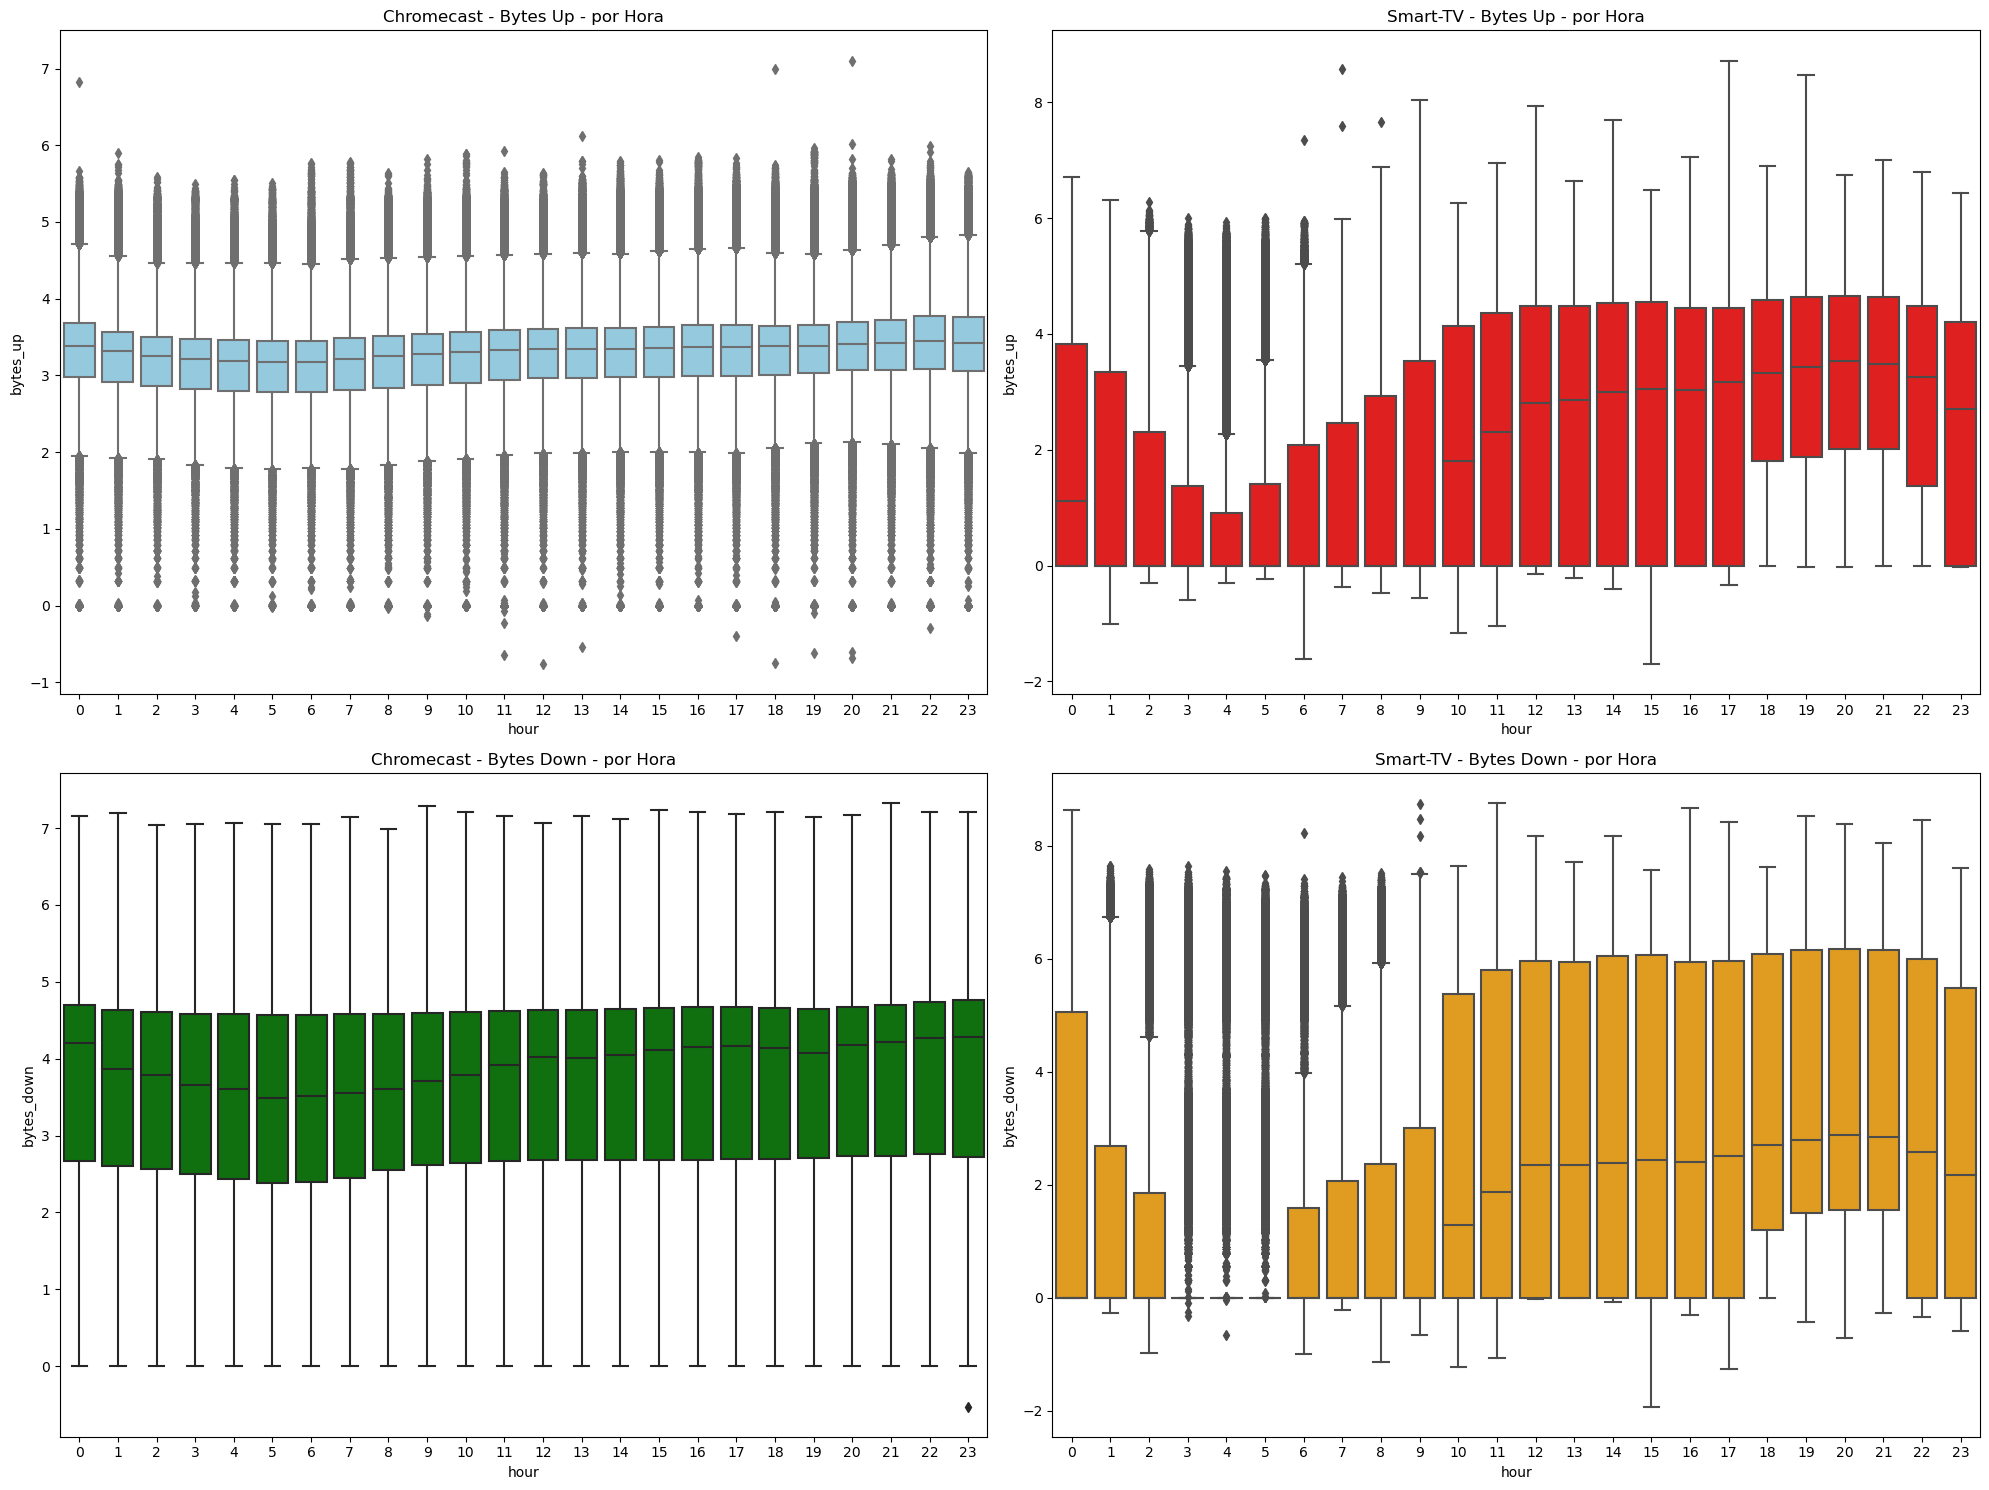

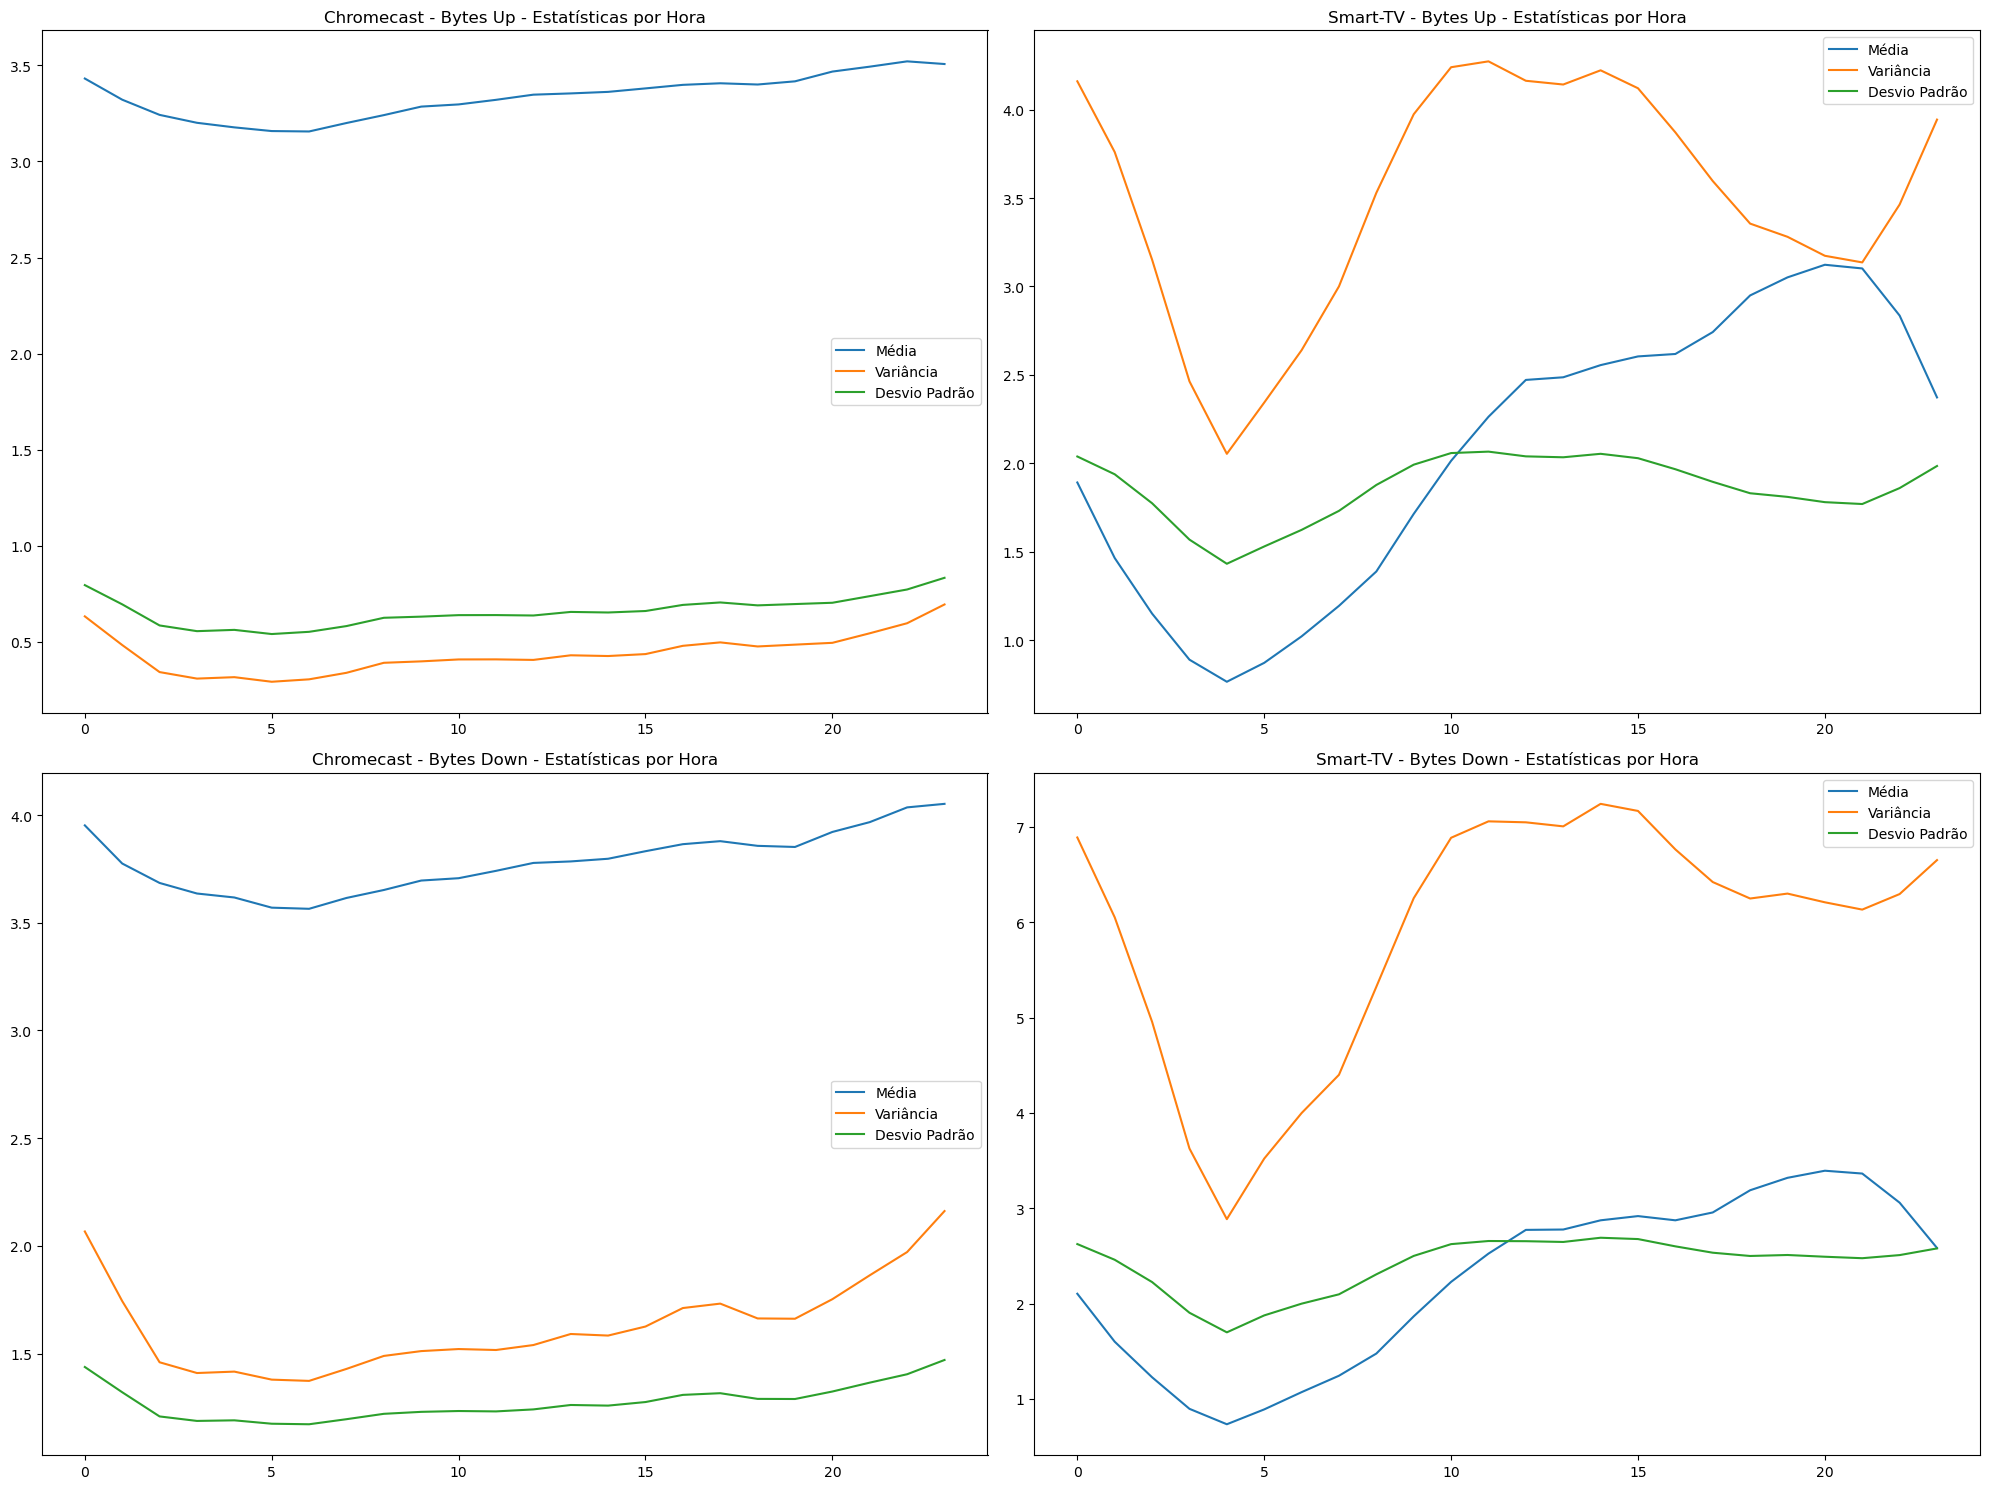

In [13]:
# Converter 'date_hour' para datetime e extrair a hora para uma coluna separada
df_chromecast['hour'] = pd.to_datetime(df_chromecast['date_hour']).dt.hour
df_smarttv['hour'] = pd.to_datetime(df_smarttv['date_hour']).dt.hour

# Agrupar por hora e calcular as estatísticas
stats_chromecast = df_chromecast.groupby('hour')[['bytes_up', 'bytes_down']].agg(['mean', 'var', 'std'])
stats_smarttv = df_smarttv.groupby('hour')[['bytes_up', 'bytes_down']].agg(['mean', 'var', 'std'])

# Função para plotar gráficos de estatísticas
def plot_stats(stats, title, ax):
    ax.plot(stats['mean'], label='Média')
    ax.plot(stats['var'], label='Variância')
    ax.plot(stats['std'], label='Desvio Padrão')
    ax.set_title(title)
    ax.legend()

# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Boxplots
sns.boxplot(x='hour', y='bytes_up', data=df_chromecast, ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Chromecast - Bytes Up - por Hora')
sns.boxplot(x='hour', y='bytes_up', data=df_smarttv, ax=axes[0, 1], color='red')
axes[0, 1].set_title('Smart-TV - Bytes Up - por Hora')
sns.boxplot(x='hour', y='bytes_down', data=df_chromecast, ax=axes[1, 0], color='green')
axes[1, 0].set_title('Chromecast - Bytes Down - por Hora')
sns.boxplot(x='hour', y='bytes_down', data=df_smarttv, ax=axes[1, 1], color='orange')
axes[1, 1].set_title('Smart-TV - Bytes Down - por Hora')

plt.tight_layout()
plt.show()

# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Gráficos de estatísticas
plot_stats(stats_chromecast['bytes_up'], 'Chromecast - Bytes Up - Estatísticas por Hora', axes[0, 0])
plot_stats(stats_smarttv['bytes_up'], 'Smart-TV - Bytes Up - Estatísticas por Hora', axes[0, 1])
plot_stats(stats_chromecast['bytes_down'], 'Chromecast - Bytes Down - Estatísticas por Hora', axes[1, 0])
plot_stats(stats_smarttv['bytes_down'], 'Smart-TV - Bytes Down - Estatísticas por Hora', axes[1, 1])


plt.tight_layout()
plt.show()

# 4 Caracterizando os horários com maior valor de tráfego

## Passo 1

Escolher, a partir dos gráficos da seção 3, o horário com maior valor de média, para a taxa de upload e taxa de download, para cada tipo de dispositivo: Smart-TV e Chromecast.

In [14]:
# Verificando os horários com maior valor de média para cada coluna e criando datasets para cada um
hour_max_up_chromecast = stats_chromecast['bytes_up']['mean'].idxmax()
hour_max_down_chromecast = stats_chromecast['bytes_down']['mean'].idxmax()
hour_max_up_smarttv = stats_smarttv['bytes_up']['mean'].idxmax()
hour_max_down_smarttv = stats_smarttv['bytes_down']['mean'].idxmax()

df_chromecast_hour_max_up = df_chromecast[df_chromecast['hour'] == hour_max_up_chromecast]
df_chromecast_hour_max_down = df_chromecast[df_chromecast['hour'] == hour_max_down_chromecast]
df_smarttv_hour_max_up = df_smarttv[df_smarttv['hour'] == hour_max_up_smarttv]
df_smarttv_hour_max_down = df_smarttv[df_smarttv['hour'] == hour_max_down_smarttv]

print(f'Horários com a maior média de Bytes Up\nChromecast: {hour_max_up_chromecast}h\nSmart-TV: {hour_max_up_smarttv}h\n\nHorários com a maior média de Bytes Down\nChromecast: {hour_max_down_chromecast}h\nSmart-TV: {hour_max_down_smarttv}h')

Horários com a maior média de Bytes Up
Chromecast: 22h
Smart-TV: 20h

Horários com a maior média de Bytes Down
Chromecast: 23h
Smart-TV: 20h


In [15]:
# Como, no caso do Chromecast, a hora de maior taxa média de upload é diferente da hora de maior taxa média de download, será considerada a hora de maior taxa média de download
    
df_chromecast_max = df_chromecast[df_chromecast['hour'] == hour_max_down_chromecast]
df_smarttv_max = df_smarttv[df_smarttv['hour'] == hour_max_down_smarttv]

In [16]:
# Substituindo valores menores ou iguais a zero, a fim de possibilitar a modelagem por uma distribuição Gamma
df_chromecast_max.loc[df_chromecast_max['bytes_up'] <= 0, 'bytes_up'] = 0.01
df_chromecast_max.loc[df_chromecast_max['bytes_down'] <= 0, 'bytes_down'] = 0.01
df_smarttv_max.loc[df_smarttv_max['bytes_up'] <= 0, 'bytes_up'] = 0.01
df_smarttv_max.loc[df_smarttv_max['bytes_down'] <= 0, 'bytes_down'] = 0.01

## Passo 2

Fazer um histograma para cada um dos 4 datasets.

Número de bins
Chromecast: 17
Smart-TV: 18


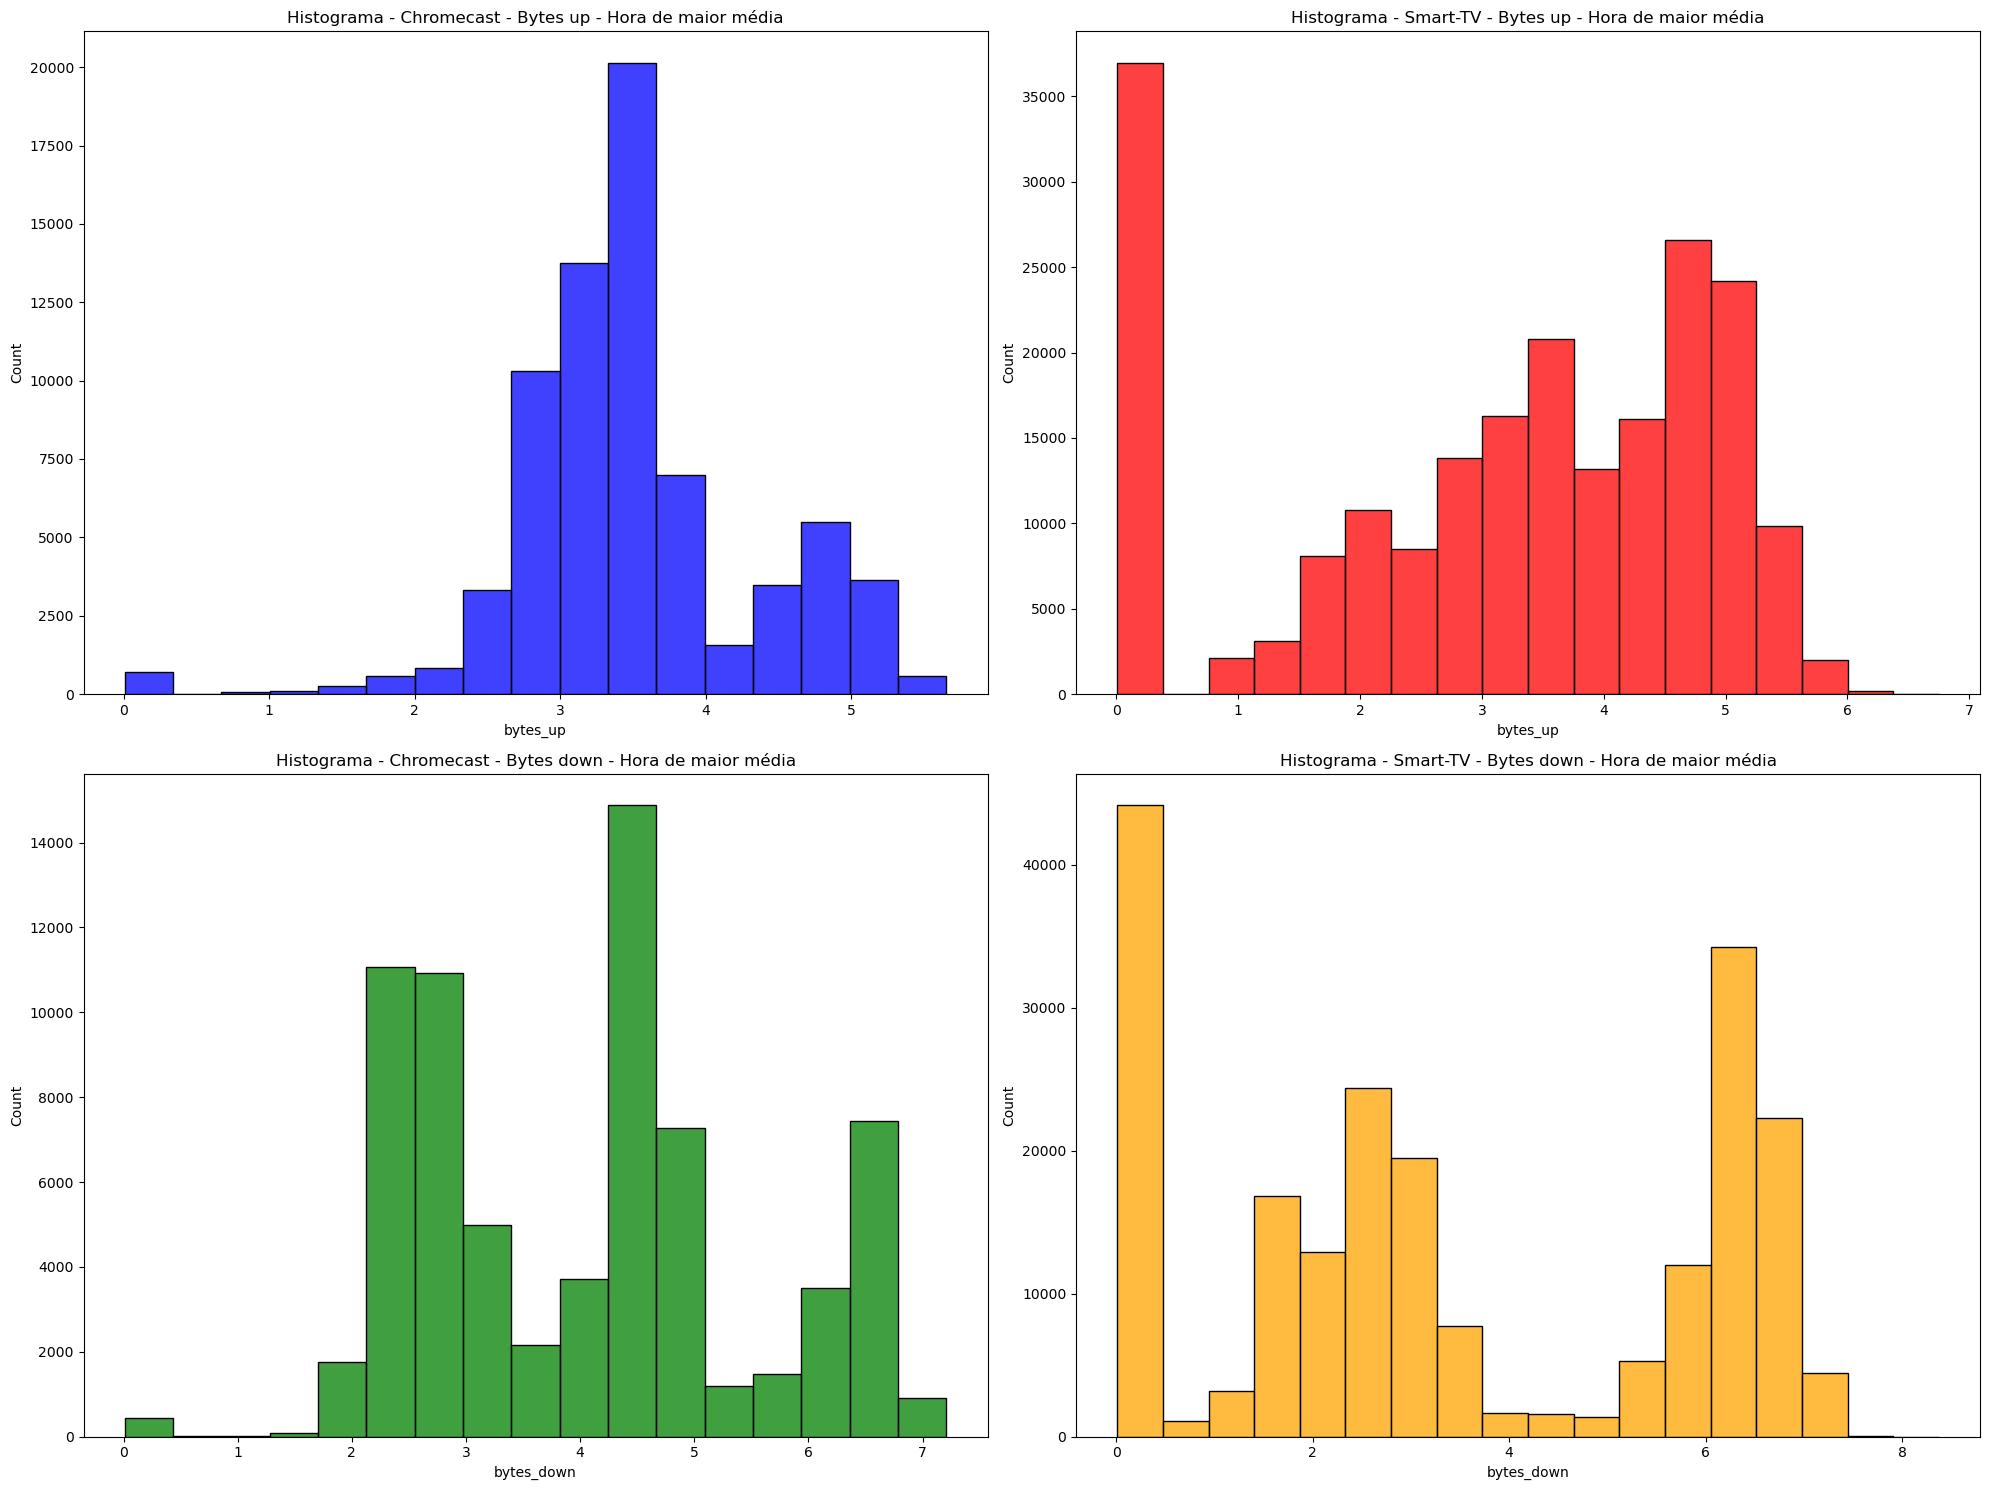

In [17]:
# Configuração dos gráficos
fig, axes = plt.subplots(2, 2, figsize=(20, 15))

# Cálculo do número de bins pelo método de Sturges
num_bins_chromecast_max = int(1 + np.log2(len(df_chromecast_max)))
num_bins_smarttv_max = int(1 + np.log2(len(df_smarttv_max)))
print(f'Número de bins\nChromecast: {num_bins_chromecast_max}\nSmart-TV: {num_bins_smarttv_max}')

# Histogramas
sns.histplot(df_chromecast_max['bytes_up'], ax=axes[0, 0], color='blue', bins=num_bins_chromecast_max)
axes[0, 0].set_title('Histograma - Chromecast - Bytes up - Hora de maior média')
sns.histplot(df_smarttv_max['bytes_up'], ax=axes[0, 1], color='red', bins=num_bins_smarttv_max)
axes[0, 1].set_title('Histograma - Smart-TV - Bytes up - Hora de maior média')

sns.histplot(df_chromecast_max['bytes_down'], ax=axes[1, 0], color='green', bins=num_bins_chromecast_max)
axes[1, 0].set_title('Histograma - Chromecast - Bytes down - Hora de maior média')
sns.histplot(df_smarttv_max['bytes_down'], ax=axes[1, 1], color='orange', bins=num_bins_smarttv_max)
axes[1, 1].set_title('Histograma - Smart-TV - Bytes down - Hora de maior média')

plt.tight_layout()

plt.show()

## Passo 3

Calcular o maximum likelihood estimator (MLE) para estimar os parâmetros das distribuições Gaussiana e Gamma para cada um dos 4 datasets.

In [18]:
# Cálculo dos parâmetros da Gaussiana para cada dataset
# Chromecast - bytes up
mu_mle_chromecast_up, sigma_mle_chromecast_up = stats.norm.fit(df_chromecast_max['bytes_up'], method="MLE")
print(f'Chromecast - Bytes up:\nMédia: {mu_mle_chromecast_up}\nVariância: {sigma_mle_chromecast_up**2}\n')

# Chromecast - bytes down
mu_mle_chromecast_down, sigma_mle_chromecast_down = stats.norm.fit(df_chromecast_max['bytes_down'], method="MLE")
print(f'Chromecast - Bytes down:\nMédia: {mu_mle_chromecast_down}\nnVariância: {sigma_mle_chromecast_down**2}\n')

# Smart-TV - bytes up
mu_mle_smarttv_up, sigma_mle_smarttv_up = stats.norm.fit(df_smarttv_max['bytes_up'], method="MLE")
print(f'Smart-TV - Bytes up:\nMédia: {mu_mle_smarttv_up}\nnVariância: {sigma_mle_smarttv_up**2}\n')

# Smart-TV - bytes down
mu_mle_smarttv_down, sigma_mle_smarttv_down = stats.norm.fit(df_smarttv_max['bytes_down'], method="MLE")
print(f'Smart-TV - Bytes down:\nMédia: {mu_mle_smarttv_down}\nnVariância: {sigma_mle_smarttv_down**2}\n')

Chromecast - Bytes up:
Média: 3.5072289288513834
Variância: 0.6942272969040405

Chromecast - Bytes down:
Média: 4.052134441221412
nVariância: 2.1610248416476785

Smart-TV - Bytes up:
Média: 3.124541050529871
nVariância: 3.1626622339718877

Smart-TV - Bytes down:
Média: 3.3961028529601927
nVariância: 6.195200390791598



In [19]:
# Chromecast - bytes up
# Calculando a estimativa inicial para o parâmetro alfa
alpha_est = df_chromecast_max['bytes_up'].mean() ** 2 / df_chromecast_max['bytes_up'].var()

# Estimando o parâmetro beta usando a média e a estimativa inicial de alfa
beta_est = alpha_est / df_chromecast_max['bytes_up'].mean()

# Estimando os parâmetros alfa e beta pelo MLE
alpha_mle_chromecast_up, _, scale_mle_chromecast_up = gamma.fit(df_chromecast_max['bytes_up'], alpha_est, scale=1/beta_est, floc=0, method='MLE')
beta_mle_chromecast_up = 1 / scale_mle_chromecast_up
print(f'Chromecast - Bytes up:\nAlfa: {alpha_mle_chromecast_up}\nBeta: {beta_mle_chromecast_up}\n')


# Chromecast - bytes down
# Calculando a estimativa inicial para o parâmetro alfa
alpha_est = df_chromecast_max['bytes_down'].mean() ** 2 / df_chromecast_max['bytes_down'].var()

# Estimando o parâmetro beta usando a média e a estimativa inicial de alfa
beta_est = alpha_est / df_chromecast_max['bytes_down'].mean()

# Estimando os parâmetros alfa e beta pelo MLE
alpha_mle_chromecast_down, _, scale_mle_chromecast_down = gamma.fit(df_chromecast_max['bytes_down'], alpha_est, scale=1/beta_est, floc=0, method='MLE')
beta_mle_chromecast_down = 1 / scale_mle_chromecast_down
print(f'Chromecast - Bytes down:\nAlfa: {alpha_mle_chromecast_down}\nBeta: {beta_mle_chromecast_down}\n')


# Smart-TV - bytes up
# Calculando a estimativa inicial para o parâmetro alfa
alpha_est = df_smarttv_max['bytes_up'].mean() ** 2 / df_smarttv_max['bytes_up'].var()

# Estimando o parâmetro beta usando a média e a estimativa inicial de alfa
beta_est = alpha_est / df_smarttv_max['bytes_up'].mean()

# Estimando os parâmetros alfa e beta pelo MLE
alpha_mle_smarttv_up, _, scale_mle_smarttv_up = gamma.fit(df_smarttv_max['bytes_up'], alpha_est, scale=1/beta_est, floc=0, method='MLE')
beta_mle_smarttv_up = 1 / scale_mle_smarttv_up
print(f'Smart-Tv - Bytes up:\nAlfa: {alpha_mle_smarttv_up}\nBeta: {beta_mle_smarttv_up}\n')


# Smart-TV - bytes down
# Calculando a estimativa inicial para o parâmetro alfa
alpha_est = df_smarttv_max['bytes_down'].mean() ** 2 / df_smarttv_max['bytes_down'].var()

# Estimando o parâmetro beta usando a média e a estimativa inicial de alfa
beta_est = alpha_est / df_smarttv_max['bytes_down'].mean()

# Estimando os parâmetros alfa e beta pelo MLE
alpha_mle_smarttv_down, _, scale_mle_smarttv_down = gamma.fit(df_smarttv_max['bytes_down'], alpha_est, scale=1/beta_est, floc=0, method='MLE')
beta_mle_smarttv_down = 1 / scale_mle_smarttv_down
print(f'Smart-TV - Bytes down:\nAlfa: {alpha_mle_smarttv_down}\nBeta: {beta_mle_smarttv_down}\n')

Chromecast - Bytes up:
Alfa: 7.213742276789802
Beta: 2.056821046794998

Chromecast - Bytes down:
Alfa: 5.395609287896328
Beta: 1.3315474513895844

Smart-Tv - Bytes up:
Alfa: 0.68097130629364
Beta: 0.21794282593219838

Smart-TV - Bytes down:
Alfa: 0.5524713131748831
Beta: 0.16267802746118976



## Passo 4

Fazer um gráfico para cada um dos 4 datasets contendo 3 curvas: o histograma, a função densidade Gaussiana com os parâmetros obtidos com o MLE e a função densidade Gamma com os parâmetros obtidos com o MLE.

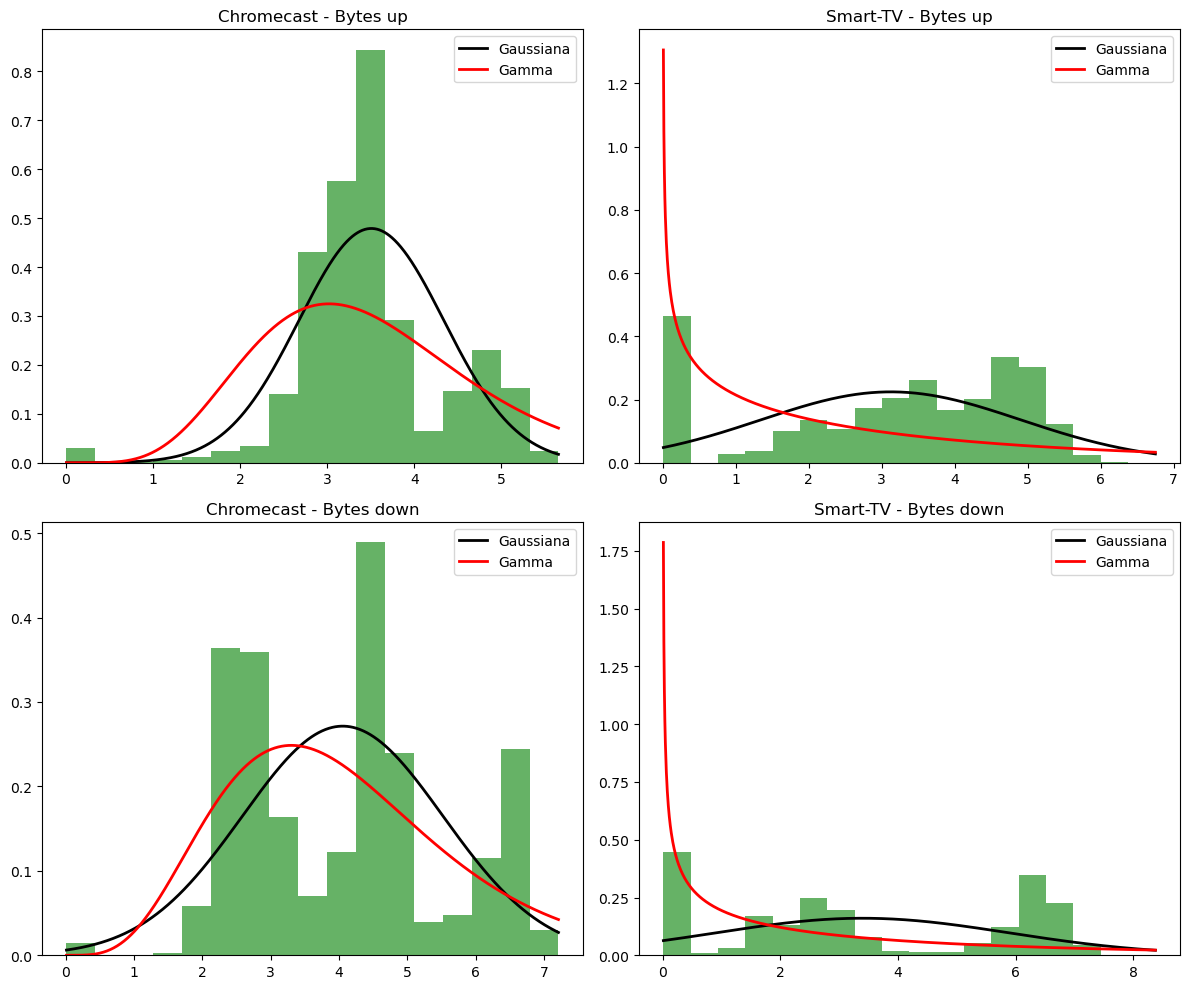

In [20]:
# Função para plotar o gráfico para um Dataset
def plot_data(data, ax, mu_mle, sigma_mle, alpha_mle, beta_mle, num_bins):
    # Dados para as funções de densidade
    x = np.linspace(min(data), max(data), 1000)

    # PDF da Gaussiana
    pdf_normal = norm.pdf(x, loc=mu_mle, scale=sigma_mle)

    # PDF da Gamma
    pdf_gamma = gamma.pdf(x, alpha_mle, scale=1/beta_mle)

    # Plotando o histograma
    ax.hist(data, bins=num_bins, density=True, alpha=0.6, color='g')

    # Plotando a PDF da Gaussiana
    ax.plot(x, pdf_normal, 'k', linewidth=2, label='Gaussiana')

    # Plotando a PDF da Gamma
    ax.plot(x, pdf_gamma, 'r', linewidth=2, label='Gamma')

# Configurando a figura para os subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Plotando para cada Dataset
plot_data(df_chromecast_max['bytes_up'], axes[0, 0], mu_mle_chromecast_up, sigma_mle_chromecast_up, alpha_mle_chromecast_up, beta_mle_chromecast_up, num_bins_chromecast_max)
axes[0, 0].set_title('Chromecast - Bytes up')
axes[0, 0].legend()

plot_data(df_smarttv_max['bytes_up'], axes[0, 1], mu_mle_smarttv_up, sigma_mle_smarttv_up, alpha_mle_smarttv_up, beta_mle_smarttv_up, num_bins_smarttv_max)
axes[0, 1].set_title('Smart-TV - Bytes up')
axes[0, 1].legend()

plot_data(df_chromecast_max['bytes_down'], axes[1, 0], mu_mle_chromecast_down, sigma_mle_chromecast_down, alpha_mle_chromecast_down, beta_mle_chromecast_down, num_bins_chromecast_max)
axes[1, 0].set_title('Chromecast - Bytes down')
axes[1, 0].legend()

plot_data(df_smarttv_max['bytes_down'], axes[1, 1], mu_mle_smarttv_down, sigma_mle_smarttv_down, alpha_mle_smarttv_down, beta_mle_smarttv_down, num_bins_smarttv_max)
axes[1, 1].set_title('Smart-TV - Bytes down')
axes[1, 1].legend()

plt.tight_layout()
plt.show()

## Passo 5

Fazer o gráfico *Probability Plot* comparando os dados de cada dataset com as distribuições parametrizadas.

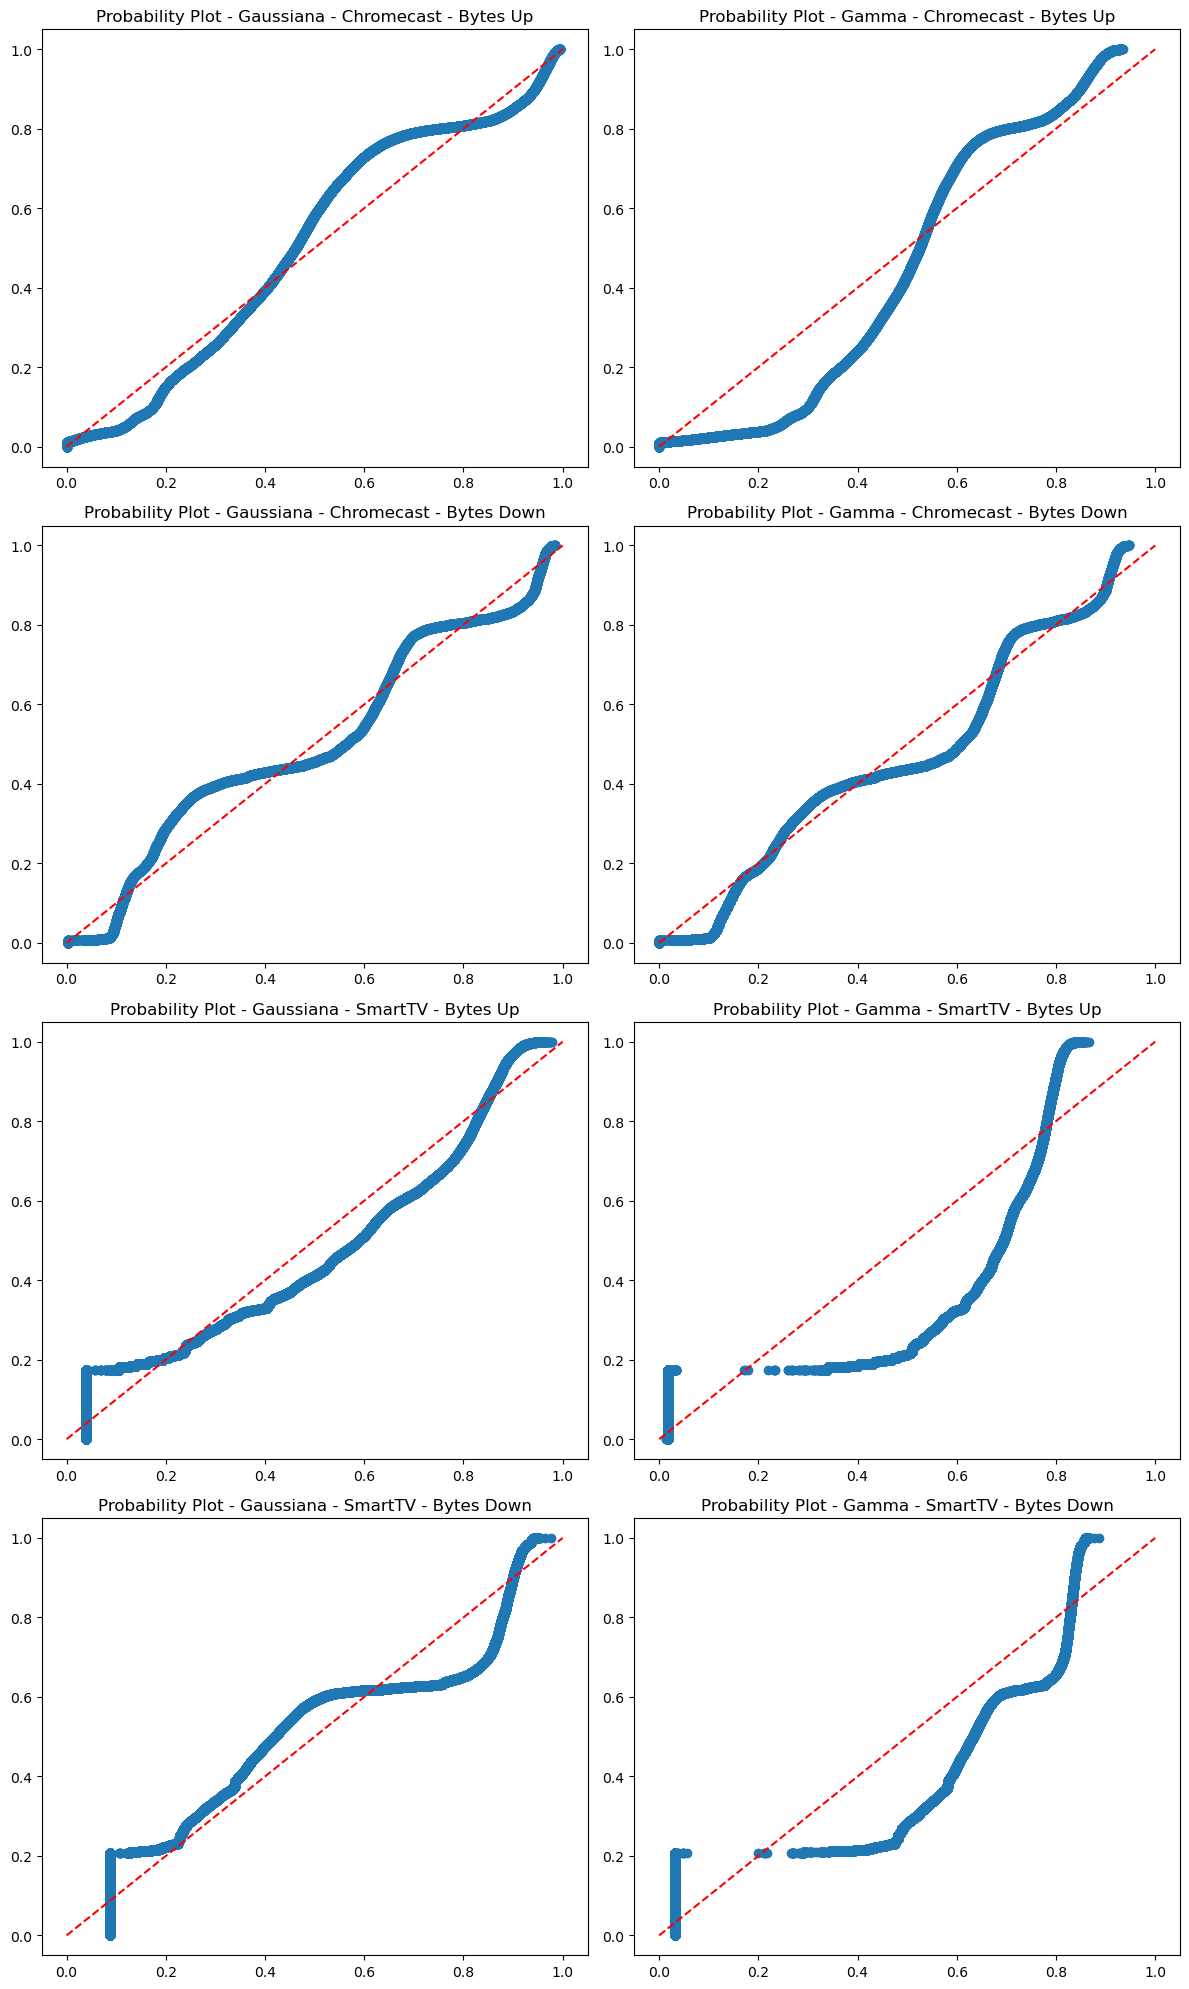

In [21]:
# Função para plotar Probability Plots para a Gaussiana e para a Gamma
def probability_plot(data, name, ax1, ax2, mu_mle, sigma_mle, alpha_mle, beta_mle):

    # Ordenar os dados e calcular a CDF empírica
    data_sorted = np.sort(data)
    ecdf = np.arange(1, len(data_sorted) + 1) / len(data_sorted)

    # CDF da Gaussiana
    cdf_normal = norm.cdf(data_sorted, mu_mle, sigma_mle)

    # CDF da Gamma
    cdf_gamma = gamma.cdf(data_sorted, alpha_mle, scale=1/beta_mle)

    # Plotando o histograma
    #ax.hist(data, bins=num_bins, density=True, alpha=0.6, color='g')

    # Plotando a CDF da Gaussiana
    ax1.scatter(cdf_normal, ecdf)
    ax1.plot([0, 1], [0, 1], 'r--')
    ax1.set_title(f'Probability Plot - Gaussiana - {name}')
    ax1.legend

    # Plotando a PDF da Gamma
    ax2.scatter(cdf_gamma, ecdf)
    ax2.plot([0, 1], [0, 1], 'r--')
    ax2.set_title(f'Probability Plot - Gamma - {name}')
    ax2.legend

# Dicionário com datasets e respectivos nomes
datasets = {
    'Chromecast - Bytes Up': df_chromecast_max['bytes_up'],
    'Chromecast - Bytes Down': df_chromecast_max['bytes_down'],
    'SmartTV - Bytes Up': df_smarttv_max['bytes_up'],
    'SmartTV - Bytes Down': df_smarttv_max['bytes_down']
}

# Parâmetros estimados para cada dataset
alpha = [alpha_mle_chromecast_up, alpha_mle_chromecast_down, alpha_mle_smarttv_up, alpha_mle_smarttv_down]
beta = [beta_mle_chromecast_up, beta_mle_chromecast_down, beta_mle_smarttv_up, beta_mle_smarttv_down]
mu = [mu_mle_chromecast_up, mu_mle_chromecast_down, mu_mle_smarttv_up, mu_mle_smarttv_down]
sigma = [sigma_mle_chromecast_up, sigma_mle_chromecast_down, sigma_mle_smarttv_up, sigma_mle_smarttv_down]
    
# Configuração da figura para os subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 20))

# Loop sobre cada conjunto de dados
for i, (title, data) in enumerate(datasets.items()):
    # Probability Plot para cada dataset
    probability_plot(data, title, axes[i,0], axes[i,1], mu[i], sigma[i], alpha[i], beta[i])

plt.tight_layout()
plt.show()

## Passo 6

Fazer o gráfico QQ Plot comparando os dados do dataset 1 com aqueles do dataset 3, e os dados do dataset 2 com aqueles do dataset 4.

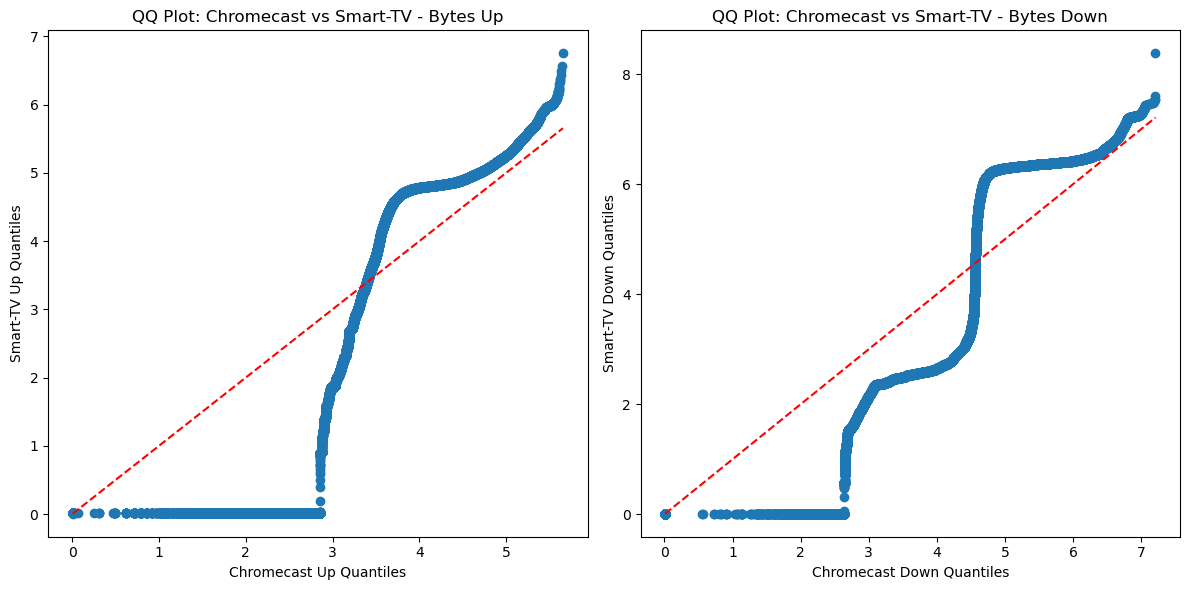

In [22]:
# Função para interpolar os dados
def interpolate_quantiles(smaller_dataset, larger_dataset):
    # Ordenando os datasets
    smaller_sorted = np.sort(smaller_dataset)
    larger_sorted = np.sort(larger_dataset)

    # Calculando os quantis do menor dataset
    quantiles = np.arange(1, len(smaller_sorted) + 1) / len(smaller_sorted)

    # Interpolando os valores para o maior dataset
    interpolated_values = np.interp(quantiles, np.arange(1, len(larger_sorted) + 1) / len(larger_sorted), larger_sorted)

    return smaller_sorted, interpolated_values

# Configuração da figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Comparando Uploads (Dataset 1 vs Dataset 3)
if len(df_chromecast_max) < len(df_smarttv_max):
    bytes_up_chromecast, bytes_up_smarttv = interpolate_quantiles(df_chromecast_max['bytes_up'], df_smarttv_max['bytes_up'])
else:
    bytes_up_smarttv, bytes_up_chromecast = interpolate_quantiles(df_smarttv_max['bytes_up'], df_chromecast_max['bytes_up'])

axes[0].scatter(bytes_up_chromecast, bytes_up_smarttv)
axes[0].plot([bytes_up_chromecast.min(), bytes_up_chromecast.max()], [bytes_up_chromecast.min(), bytes_up_chromecast.max()], 'r--')
axes[0].set_title('QQ Plot: Chromecast vs Smart-TV - Bytes Up')
axes[0].set_xlabel('Chromecast Up Quantiles')
axes[0].set_ylabel('Smart-TV Up Quantiles')

# Comparando Downloads (Dataset 2 vs Dataset 4)
if len(df_chromecast_max) < len(df_smarttv_max):
    bytes_down_chromecast, bytes_down_smarttv = interpolate_quantiles(df_chromecast_max['bytes_down'], df_smarttv_max['bytes_down'])
else:
    bytes_down_smarttv, bytes_down_chromecast = interpolate_quantiles(df_smarttv_max['bytes_down'], df_chromecast_max['bytes_down'])
axes[1].scatter(bytes_down_chromecast, bytes_down_smarttv)
axes[1].plot([bytes_down_chromecast.min(), bytes_down_chromecast.max()], [bytes_down_chromecast.min(), bytes_down_chromecast.max()], 'r--')
axes[1].set_title('QQ Plot: Chromecast vs Smart-TV - Bytes Down')
axes[1].set_xlabel('Chromecast Down Quantiles')
axes[1].set_ylabel('Smart-TV Down Quantiles')

plt.tight_layout()
plt.show()

# 5 Análise da correlação entre as taxas de upload e download para os horários com o maior valor de tráfego

In [23]:
# Cálculo do coeficiente de correlação para os dados de Chromecast
correlation_matrix_chromecast = np.corrcoef(df_chromecast_max['bytes_up'], df_chromecast_max['bytes_down'])
correlation_coefficient_chromecast = correlation_matrix_chromecast[0, 1]

# Cálculo do coeficiente de correlação para os dados de Smart-TV
correlation_matrix_smarttv = np.corrcoef(df_smarttv_max['bytes_up'], df_smarttv_max['bytes_down'])
correlation_coefficient_smarttv = correlation_matrix_smarttv[0, 1]

print(f"Coeficiente de correlação dos dados\n\nChromecast: {correlation_coefficient_chromecast}\nSmart-TV: {correlation_coefficient_smarttv}")

Coeficiente de correlação dos dados

Chromecast: 0.7920078607078146
Smart-TV: 0.9155147129101351


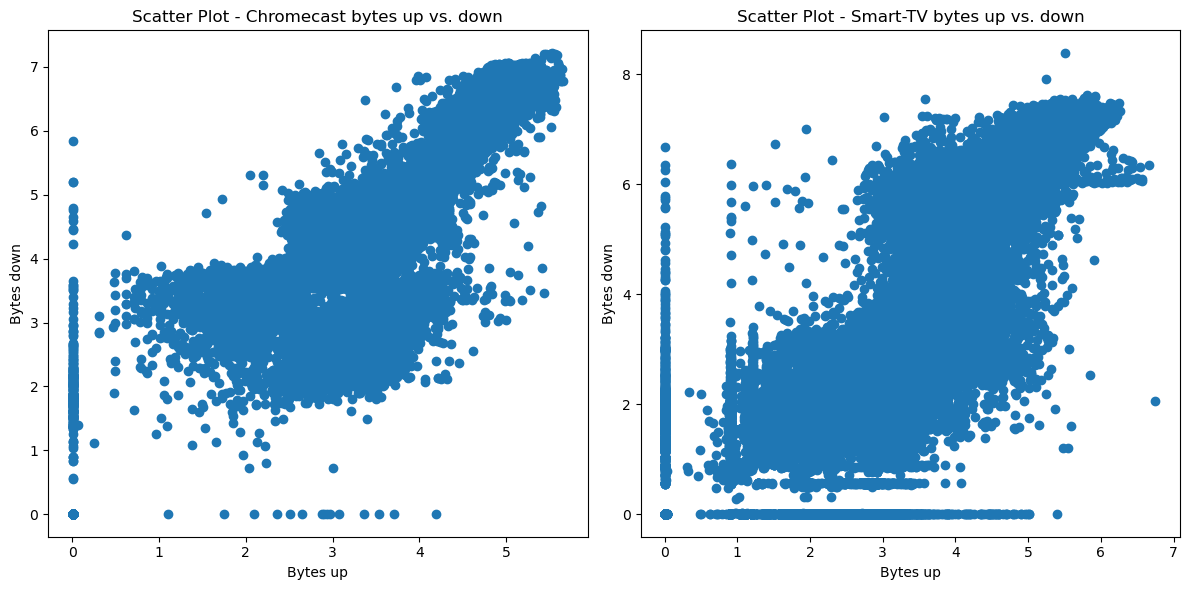

In [24]:
# Configuração da figura para os subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Comparando Uploads (Dataset 1 vs Dataset 3)
axes[0].scatter(df_chromecast_max['bytes_up'], df_chromecast_max['bytes_down'])
axes[0].set_title('Scatter Plot - Chromecast bytes up vs. down')
axes[0].set_xlabel('Bytes up')
axes[0].set_ylabel('Bytes down')

# Comparando Uploads (Dataset 1 vs Dataset 3)
axes[1].scatter(df_smarttv_max['bytes_up'], df_smarttv_max['bytes_down'])
axes[1].set_title('Scatter Plot - Smart-TV bytes up vs. down')
axes[1].set_xlabel('Bytes up')
axes[1].set_ylabel('Bytes down')

plt.tight_layout()
plt.show()

# 6 Comparação dos dados gerados pelos dispositivos Smart-TV e Chromecast

In [25]:
# Verificando o número de bins pelo método de Sturges
print(f'Número de bins Chromecast: {num_bins_chromecast_max}\nNúmero de bins Smart-TV: {num_bins_smarttv_max}')

Número de bins Chromecast: 17
Número de bins Smart-TV: 18


In [26]:
# Utilização do número de bins do conjunto de dados de Smart-TV como referência
num_bins = num_bins_smarttv_max

# Criar histogramas para upload e download
hist_chromecast_upload, _ = np.histogram(df_chromecast_max['bytes_up'], bins=num_bins)
hist_smarttv_upload, _ = np.histogram(df_smarttv_max['bytes_up'], bins=num_bins)
hist_chromecast_download, _ = np.histogram(df_chromecast_max['bytes_down'], bins=num_bins)
hist_smarttv_download, _ = np.histogram(df_smarttv_max['bytes_down'], bins=num_bins)

# Como a quantidade de amostras nos datasets de Chromecast e Smart-TV são diferentes
hist_smarttv_upload = hist_smarttv_upload / len(df_smarttv_max) * len(df_chromecast_max)
hist_smarttv_download = hist_smarttv_download / len(df_smarttv_max) * len(df_chromecast_max)

# Cálculo das estatísticas G
g_statistic_upload = 2 * np.sum(hist_chromecast_upload * np.log(hist_chromecast_upload / hist_smarttv_upload))
g_statistic_download = 2 * np.sum(hist_chromecast_download * np.log(hist_chromecast_download / hist_smarttv_download))

# Cálculo dos p-valores
p_value_upload = chi2.sf(g_statistic_upload, df=num_bins-1)
p_value_download = chi2.sf(g_statistic_download, df=num_bins-1)

print(f"Estatística G para Upload: {g_statistic_upload}, p-valor: {p_value_upload}")
print(f"Estatística G para Download: {g_statistic_download}, p-valor: {p_value_download}")

Estatística G para Upload: 118508.62325016086, p-valor: 0.0
Estatística G para Download: 231156.76502101214, p-valor: 0.0
